In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt

In [114]:
with open("training_data.txt", "r") as file:
    faqs = file.read()

In [141]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([faqs])
print((tokenizer.word_index))
input_sequences = []
for sentence in faqs.split('\n'):
    tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1, len(tokenized_sentence)):
        input_sequences.append(tokenized_sentence[:i+1])

{'the': 1, 'of': 2, 'and': 3, 'his': 4, 'a': 5, 'i': 6, 'to': 7, 'in': 8, 'was': 9, 'he': 10, 'with': 11, 'that': 12, 'my': 13, 'you': 14, 'own': 15, 'which': 16, 'had': 17, 'adventure': 18, 'have': 19, 'it': 20, 'for': 21, 'but': 22, 'as': 23, 'me': 24, 'from': 25, 'up': 26, 'case': 27, 'chapter': 28, 'holmes': 29, 'not': 30, 'all': 31, 'one': 32, 'were': 33, 'woman': 34, 'him': 35, 'upon': 36, 'more': 37, 'little': 38, 'who': 39, 'been': 40, 'see': 41, 'again': 42, 'know': 43, 'how': 44, 'scandal': 45, 'bohemia': 46, 'man': 47, 'she': 48, 'always': 49, 'seldom': 50, 'heard': 51, 'her': 52, 'any': 53, 'other': 54, 'whole': 55, 'emotion': 56, 'irene': 57, 'adler': 58, 'mind': 59, 'most': 60, 'seen': 61, 'would': 62, 'himself': 63, 'such': 64, 'into': 65, 'be': 66, 'nature': 67, 'lately': 68, 'every': 69, 'baker': 70, 'street': 71, 'week': 72, 'drug': 73, 'keen': 74, 'by': 75, 'study': 76, 'extraordinary': 77, 'powers': 78, 'out': 79, 'those': 80, 'clearing': 81, 'time': 82, 'some': 83,

In [143]:
print(input_sequences)

[[5, 45], [5, 45, 8], [5, 45, 8, 46], [1, 98], [1, 98, 99], [1, 98, 99, 100], [5, 27], [5, 27, 2], [5, 27, 2, 101], [1, 102], [1, 102, 103], [1, 102, 103, 104], [1, 105], [1, 105, 106], [1, 105, 106, 107], [1, 47], [1, 47, 11], [1, 47, 11, 1], [1, 47, 11, 1, 108], [1, 47, 11, 1, 108, 109], [1, 18], [1, 18, 2], [1, 18, 2, 1], [1, 18, 2, 1, 110], [1, 18, 2, 1, 110, 111], [1, 18], [1, 18, 2], [1, 18, 2, 1], [1, 18, 2, 1, 112], [1, 18, 2, 1, 112, 113], [1, 18], [1, 18, 2], [1, 18, 2, 1], [1, 18, 2, 1, 114], [1, 18, 2, 1, 114, 115], [1, 18], [1, 18, 2], [1, 18, 2, 1], [1, 18, 2, 1, 116], [1, 18, 2, 1, 116, 117], [1, 18], [1, 18, 2], [1, 18, 2, 1], [1, 18, 2, 1, 118], [1, 18, 2, 1, 118, 119], [1, 18], [1, 18, 2], [1, 18, 2, 1], [1, 18, 2, 1, 120], [1, 18, 2, 1, 120, 121], [5, 45], [5, 45, 8], [5, 45, 8, 46], [122, 2], [122, 2, 123], [28, 124], [28, 125], [28, 126], [28, 6], [7, 127], [7, 127, 29], [7, 127, 29, 48], [7, 127, 29, 48, 128], [7, 127, 29, 48, 128, 49], [7, 127, 29, 48, 128, 49, 1

In [117]:
max_len = max([len(x) for x in input_sequences])
print(max_len)
padded_input_sequences = pad_sequences(input_sequences, maxlen=max_len, padding='pre')
print(padded_input_sequences)
X = padded_input_sequences[:,:-1]
y = padded_input_sequences[:, -1]
print(X.shape)
print(y.shape)

15
[[  0   0   0 ...   0   5  45]
 [  0   0   0 ...   5  45   8]
 [  0   0   0 ...  45   8  46]
 ...
 [  0   0   0 ...  60 411   3]
 [  0   0   0 ...   0 412 413]
 [  0   0   0 ... 412 413 414]]
(770, 14)
(770,)


In [118]:
y = tf.keras.utils.to_categorical(y, num_classes=len(tokenizer.word_index)+1)
print(y.shape)

(770, 415)


In [121]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_shape=(max_len,)))
model.add(LSTM(units=200))
model.add(Dense(units=len(tokenizer.word_index)+1, activation='softmax'))


In [122]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [123]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ (None, 15, 100)        │        41,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 150)            │       150,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 415)            │        62,665 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 254,765 (995.18 KB)

 Trainable params: 254,765 (995.18 KB)

 Non-trainable params: 0 (0.00 B)

In [124]:
history = model.fit(X, y, epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.0242 - loss: 5.9797
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0737 - loss: 5.3021
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.0613 - loss: 5.2911
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0543 - loss: 5.3574
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0614 - loss: 5.1862
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0521 - loss: 5.2314
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0466 - loss: 5.1607
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0502 - loss: 5.0041
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0676 - loss: 4.9331
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0842 - loss: 4.8528
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1030 - loss: 4.6808
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step

In [126]:
model.save("trained_model.keras")

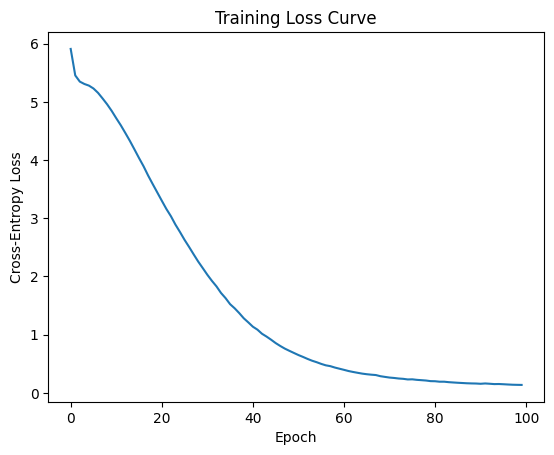

In [127]:
plt.plot(history.history['loss'])
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.show()

In [128]:
loaded_model = tf.keras.models.load_model("trained_model.keras")

In [137]:
# with open("test_data.txt", "r") as file:
test_text = "My name is"

In [138]:
# test_sequence = tokenizer.texts_to_sequences([test_text])[0]
# padded_test_sequence = pad_sequences([test_sequence], maxlen=56, padding='pre')

In [139]:
# pos= np.argmax(loaded_model.predict(padded_test_sequence))

In [140]:
for i in range(10):
  print(test_text,"\n")
  test_sequence = tokenizer.texts_to_sequences([test_text])[0]
  padded_test_sequence = pad_sequences([test_sequence], maxlen=56, padding='pre')
  pos= np.argmax(loaded_model.predict(padded_test_sequence))
  for word,index in tokenizer.word_index.items():
      if index == pos:
        test_text = test_text + " " + word
        print(test_text)
      

My name is 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
My name is a
My name is a 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
My name is a nature
My name is a nature 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
My name is a nature such
My name is a nature such 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
My name is a nature such as
My name is a nature such as 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
My name is a nature such as his
My name is a nature such as his 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
My name is a nature such as his head
My name is a nature such as his head 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
My name is a nature such as his head sunk
My name is a nature such as his head sunk 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
My name is a nature such as his head sunk upon
My name is a nature such as his head sunk upon 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
My name is a nature such as his head sunk upon his
My name is a nature such as his head sunk upon his 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/ste

In [85]:
predicted_index = np.argmax(predicted_probabilities, axis=-1).numpy()[0]
# Map the index back to the word using the tokenizer
predicted_word = tokenizer.index_word[predicted_index]

# Display the predicted word
print("Predicted Next Word:", predicted_word)

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'